In [19]:
import pandas as pd 
import re
import numpy as np
!pip install hazm
from hazm import word_tokenize
from keras.preprocessing import text as keras_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
with open('daftar4.txt') as f:
    dataset = f.readlines ()
  
dataset = [ x.replace ('\t', ' ').replace ('\u200f', '').replace('\n', '') for x in dataset ]
print (dataset)

['دفتر چهارم', '', 'اى ضياء الحق حسام الدين توى كه گذشت از مه به نورت مثنوى', 'همت عالى تو اى مرتجا مىكشد اين را خدا داند كجا', 'گردن اين مثنوى را بستهاى مىكشى آن سوى كه دانستهاى', 'مثنوى پويان كشنده ناپديد ناپديد از جاهلى كش نيست ديد', 'مثنوى را چون تو مبدا بودهاى گر فزون گردد تواش افزودهاى', 'چون چنين خواهى خدا خواهد چنين مىدهد حق آرزوى متقين', 'كان لله بودهاى در ما مضى تا كه كان اللَّه پيش آمد جزا', 'مثنوى از تو هزاران شكر داشت در دعا و شكر كفها بر فراشت', 'در لب و كفش خدا شكر تو ديد فضل كرد و لطف فرمود و مزيد', 'ز انكه شاكر را زيادت وعده است آن چنان كه قرب مزد سجده است', 'گفت وَ اسْجُدْ وَ اقْتَرِبْ يزدان ما قرب جان شد سجدهى ابدان ما', 'گر زيادت مىشود زين رو بود نه از براى بوش و هاى و هو بود', 'با تو ما چون رز به تابستان خوشيم حكم دارى هين بكش تا مىكشيم', 'خوش بكش اين كاروان را تا به حج اى امير صبر مفتاح الفرج', 'حج زيارت كردن خانه بود حج رب البيت مردانه بود', 'ز آن ضيا گفتم حسام الدين ترا كه تو خورشيدى و اين دو وصفها', 'كاين حسام و اين ضيا يكى است هين تيغ خورشيد از ضيا باشد يقين',

In [15]:
with open('stopwords.txt') as f:
    stopwords = f.readlines ()

stopwords = [ x.replace ('\t', '').replace ('\n', '').replace ('\u200f', '').replace ('\ufeff', ''). replace ('\u200c', '') for x in stopwords ]
print (stopwords)

['!', '"', '#', '(', ')', '*', ',', '-', '.', '/', ':', '[', ']', '«', '»', '،', '؛', '؟اتفاقا', 'احتراما', 'احتمالا', 'اري', 'آري', 'از', 'ازجمله', 'اساسا', 'است', 'اش', 'اشكارا', 'آشكارا', 'اصلا', 'اصولا', 'اغلب', 'اكثرا', 'اكنون', 'الان', 'الآن', 'البته', 'ام', 'اما', 'امد', 'آمد', 'امدم', 'آمد', 'امدن', 'آمدن', 'امدند', 'آمدند', 'امده', 'آمده', 'امدي', 'آمدی', 'امديد', 'آمدید', 'امديم', 'آمدیم', 'امروزه', 'امسال', 'امشب', 'ان', 'آن', 'اند', 'انشاالله', 'انصافا', 'انطور', 'آنطور', 'انقدر', 'آنقدر', 'انها', 'آنها', 'انچنان', 'آنچنان', 'انگار', 'او', 'اورد', 'آورد', 'اوردم', 'آوردم', 'اوردن', 'آوردن', 'اوردند', 'آوردند', 'اورده', 'آورده', 'اوردي', 'آوردی', 'اورديد', 'آوردید', 'اورديم', 'آوردیم', 'اورم', 'آورم', 'اورند', 'آورند', 'اوري', 'آوری', 'اوريد', 'آورید', 'اوريم', 'آوری', 'اولا', 'اي', 'آی', 'ايا', 'آیا', 'ايد', 'ايشان', 'ايم', 'اين', 'ايند', 'آيند', 'اينطور', 'اينقدر', 'اينك', 'اينها', 'اينچنين', 'اينگونه', 'ايي', 'آیی', 'اييد', 'آیید', 'اييم', 'آییم', 'اگر', 'با', 'بار', 'بار

In [16]:
Final_Data_Set = []

for txt in dataset :
  # list of words in a sentence
  sentence_list = word_tokenize(txt)
  clean_list = []
  clean_sentence = ""
  for word in sentence_list:
    if word not in stopwords:
      clean_sentence += word + " "
      clean_list.append(word)
  if len(clean_list) > 3:
    Final_Data_Set.append(clean_sentence.strip())

Final_Data_Set

['اى ضياء الحق حسام الدين توى گذشت مه نورت مثنوى',
 'همت عالى اى مرتجا مىكشد خدا داند',
 'گردن مثنوى بستهاى مىكشى سوى دانستهاى',
 'مثنوى پويان كشنده ناپديد ناپديد جاهلى كش ديد',
 'مثنوى مبدا بودهاى فزون گردد تواش افزودهاى',
 'خواهى خدا خواهد_چنين مىدهد حق آرزوى متقين',
 'كان لله بودهاى مضى كان اللَّه جزا',
 'مثنوى هزاران شكر دعا شكر كفها فراشت',
 'لب كفش خدا شكر ديد فضل لطف فرمود مزيد',
 'انكه شاكر زيادت وعده قرب مزد سجده',
 'وَ اسْجُدْ وَ اقْتَرِبْ يزدان قرب جان سجدهى ابدان',
 'زيادت مىشود زين براى بوش هاى هو',
 'رز تابستان خوشيم حكم دارى هين بكش مىكشيم',
 'خوش بكش كاروان حج اى امير صبر مفتاح الفرج',
 'حج زيارت خانه حج رب البيت مردانه',
 'ضيا حسام الدين ترا خورشيدى وصفها',
 'كاين حسام ضيا يكى هين تيغ خورشيد ضيا يقين',
 'نور ماه وين ضيا خورشيد فرو خوان نبا',
 'شمس قرآن ضيا خواند اى پدر قمر نور خواند نگر',
 'شمس عالىتر ماه ضيا نور افزون دان جاه',
 'بس نور مه منهج نديد آفتاب پديد',
 'آفتاب اعواض كامل نمود لاجرم بازارها روز',
 'قلب نقد نيك آيد پديد غبن حيله بعيد',
 'نورش كامل زمين تاجران 

In [18]:
full_sentence = ""
for sentences in Final_Data_Set:
  full_sentence += sentences + " "
print(full_sentence)
words = full_sentence.split()
vocabs = set(words)
print(vocabs)
print(len(vocabs))

word_to_ix = {word: i for i, word in enumerate(vocabs)}
ix_to_word = {i: word for i, word in enumerate(vocabs)}

اى ضياء الحق حسام الدين توى گذشت مه نورت مثنوى همت عالى اى مرتجا مىكشد خدا داند گردن مثنوى بستهاى مىكشى سوى دانستهاى مثنوى پويان كشنده ناپديد ناپديد جاهلى كش ديد مثنوى مبدا بودهاى فزون گردد تواش افزودهاى خواهى خدا خواهد_چنين مىدهد حق آرزوى متقين كان لله بودهاى مضى كان اللَّه جزا مثنوى هزاران شكر دعا شكر كفها فراشت لب كفش خدا شكر ديد فضل لطف فرمود مزيد انكه شاكر زيادت وعده قرب مزد سجده وَ اسْجُدْ وَ اقْتَرِبْ يزدان قرب جان سجدهى ابدان زيادت مىشود زين براى بوش هاى هو رز تابستان خوشيم حكم دارى هين بكش مىكشيم خوش بكش كاروان حج اى امير صبر مفتاح الفرج حج زيارت خانه حج رب البيت مردانه ضيا حسام الدين ترا خورشيدى وصفها كاين حسام ضيا يكى هين تيغ خورشيد ضيا يقين نور ماه وين ضيا خورشيد فرو خوان نبا شمس قرآن ضيا خواند اى پدر قمر نور خواند نگر شمس عالىتر ماه ضيا نور افزون دان جاه بس نور مه منهج نديد آفتاب پديد آفتاب اعواض كامل نمود لاجرم بازارها روز قلب نقد نيك آيد پديد غبن حيله بعيد نورش كامل زمين تاجران رَحْمَةً للعالمين ليك قلاب مبغوض سخت انك ازو كاسد نقد رخت عدوى جان صراف قلب دشمن درويش غير كلب

In [20]:
data = []
for sentences in Final_Data_Set:
  words = sentences.split()
  for i in range(2, len(words) - 2):
      context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
      target = words[i]
      data.append((context, target))
print(data[:20])
print(len(data))

[(['اى', 'ضياء', 'حسام', 'الدين'], 'الحق'), (['ضياء', 'الحق', 'الدين', 'توى'], 'حسام'), (['الحق', 'حسام', 'توى', 'گذشت'], 'الدين'), (['حسام', 'الدين', 'گذشت', 'مه'], 'توى'), (['الدين', 'توى', 'مه', 'نورت'], 'گذشت'), (['توى', 'گذشت', 'نورت', 'مثنوى'], 'مه'), (['همت', 'عالى', 'مرتجا', 'مىكشد'], 'اى'), (['عالى', 'اى', 'مىكشد', 'خدا'], 'مرتجا'), (['اى', 'مرتجا', 'خدا', 'داند'], 'مىكشد'), (['گردن', 'مثنوى', 'مىكشى', 'سوى'], 'بستهاى'), (['مثنوى', 'بستهاى', 'سوى', 'دانستهاى'], 'مىكشى'), (['مثنوى', 'پويان', 'ناپديد', 'ناپديد'], 'كشنده'), (['پويان', 'كشنده', 'ناپديد', 'جاهلى'], 'ناپديد'), (['كشنده', 'ناپديد', 'جاهلى', 'كش'], 'ناپديد'), (['ناپديد', 'ناپديد', 'كش', 'ديد'], 'جاهلى'), (['مثنوى', 'مبدا', 'فزون', 'گردد'], 'بودهاى'), (['مبدا', 'بودهاى', 'گردد', 'تواش'], 'فزون'), (['بودهاى', 'فزون', 'تواش', 'افزودهاى'], 'گردد'), (['خواهى', 'خدا', 'مىدهد', 'حق'], 'خواهد_چنين'), (['خدا', 'خواهد_چنين', 'حق', 'آرزوى'], 'مىدهد')]
14756


In [21]:
embed_size = 50
embed_dim = embed_size
context_size = 2
vocab_size = len(vocabs)
embeddings =  np.random.random_sample((vocab_size, embed_dim))

In [22]:
def linear(m, theta):
    w = theta
    return m.dot(w)

def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)
    
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]

In [23]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    
    return m, n, o

def backward(preds, theta, target_idxs):
    m, n, o = preds
    
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    
    return dw
    
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [25]:
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))
epoch_size = 20

In [26]:
epoch_losses = {}

for epoch in range(epoch_size):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
        
     
    epoch_losses[epoch] = losses
    print(f"Epoch: {epoch+1}/{epoch_size} -- loss: {epoch_losses[epoch][0]} ")

Epoch: 1/20 -- loss: 16.63200113482198 
Epoch: 2/20 -- loss: 1.192103005750782 
Epoch: 3/20 -- loss: 0.4317701055381774 
Epoch: 4/20 -- loss: 0.2771551199573467 
Epoch: 5/20 -- loss: 0.20116509557895199 
Epoch: 6/20 -- loss: 0.14977943871599794 
Epoch: 7/20 -- loss: 0.11278073350115898 
Epoch: 8/20 -- loss: 0.08624111139128596 
Epoch: 9/20 -- loss: 0.06772789253850148 
Epoch: 10/20 -- loss: 0.05502097653183068 
Epoch: 11/20 -- loss: 0.04623588392850269 
Epoch: 12/20 -- loss: 0.04002606697188985 
Epoch: 13/20 -- loss: 0.0355132957756115 
Epoch: 14/20 -- loss: 0.03213840785749119 
Epoch: 15/20 -- loss: 0.029544763895138892 
Epoch: 16/20 -- loss: 0.02750203934012521 
Epoch: 17/20 -- loss: 0.02585761758385766 
Epoch: 18/20 -- loss: 0.02450565585363603 
Epoch: 19/20 -- loss: 0.02336918554039813 
Epoch: 20/20 -- loss: 0.02239029910759047 


Text(0, 0.5, 'Losses')

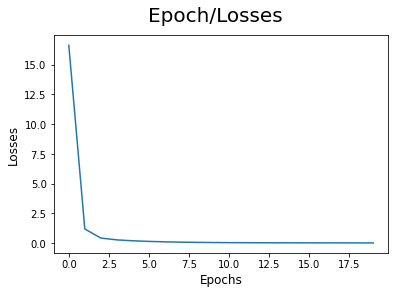

In [29]:
from matplotlib import pyplot as plt
ix = np.arange(0,epoch_size)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [30]:
#word vector for each words
vector_dict = {}
for voc in vocabs:
  vector_dict[voc] = embeddings[word_to_ix[voc]]

In [31]:
from sklearn.metrics.pairwise import euclidean_distances

distance_matrix = euclidean_distances(embeddings)
print(distance_matrix.shape)

(8522, 8522)


In [33]:
import random
random_10vocabs = random.sample(vocabs, 10)
similar_words = {}
for rand_vocab in random_10vocabs:
  similar_words[rand_vocab] = [[ix_to_word[idx], np.linalg.norm(embeddings[idx] - embeddings[word_to_ix[rand_vocab]])] for idx in distance_matrix[word_to_ix[rand_vocab]].argsort()[:20]] 
similar_words

{'اضطرار': [['اضطرار', 0.0],
  ['كهف', 1.915683510641527],
  ['تيرهى', 2.0913070926131225],
  ['الغرور', 2.1530852127957765],
  ['ستاره', 2.1997595130808323],
  ['مصطفى', 2.2064863668550556],
  ['دستنبوى', 2.2115673200807935],
  ['توانى', 2.211797853936075],
  ['همسايه', 2.2163568460461356],
  ['مباد', 2.2257402467377143],
  ['بلاغ', 2.2289881771842364],
  ['برقرار', 2.2355174180508843],
  ['خورشيد', 2.2509865062989767],
  ['آهنى', 2.269555749899809],
  ['بجهد', 2.2720964543923574],
  ['پف', 2.2757375369788915],
  ['نغزند', 2.2861415393599906],
  ['مگو', 2.2870361931023013],
  ['نفست', 2.2880092550886424],
  ['پوشان', 2.2999648282440663]],
 'رحمت': [['رحمت', 0.0],
  ['مضغه', 1.9409237534757788],
  ['خودى', 1.976178107083089],
  ['بره', 2.0194562329874146],
  ['جويم', 2.075054776336012],
  ['ربا', 2.0906918966554073],
  ['ظل', 2.135708523157256],
  ['شنيدى', 2.1555110728403375],
  ['اكسون', 2.1556358664448805],
  ['ناقتى', 2.1595551122302314],
  ['شريك', 2.163164181226495],
  ['جانهاشان